### 准备Python运行环境

In [ ]:
! pip install networkx
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install tqdm

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import networkx as nx

### 班级好友网络

班级好友网络来自于 2021 年硕士生课程所有学生之间的好友关系。

In [3]:
input_data = pd.read_csv('friends210914.csv', index_col=0)
DG_friends = nx.DiGraph(input_data.T.values)  # directed graph
G_friends = nx.Graph(input_data.values)  # undirected graph
print(nx.info(DG_friends))

DiGraph with 43 nodes and 218 edges


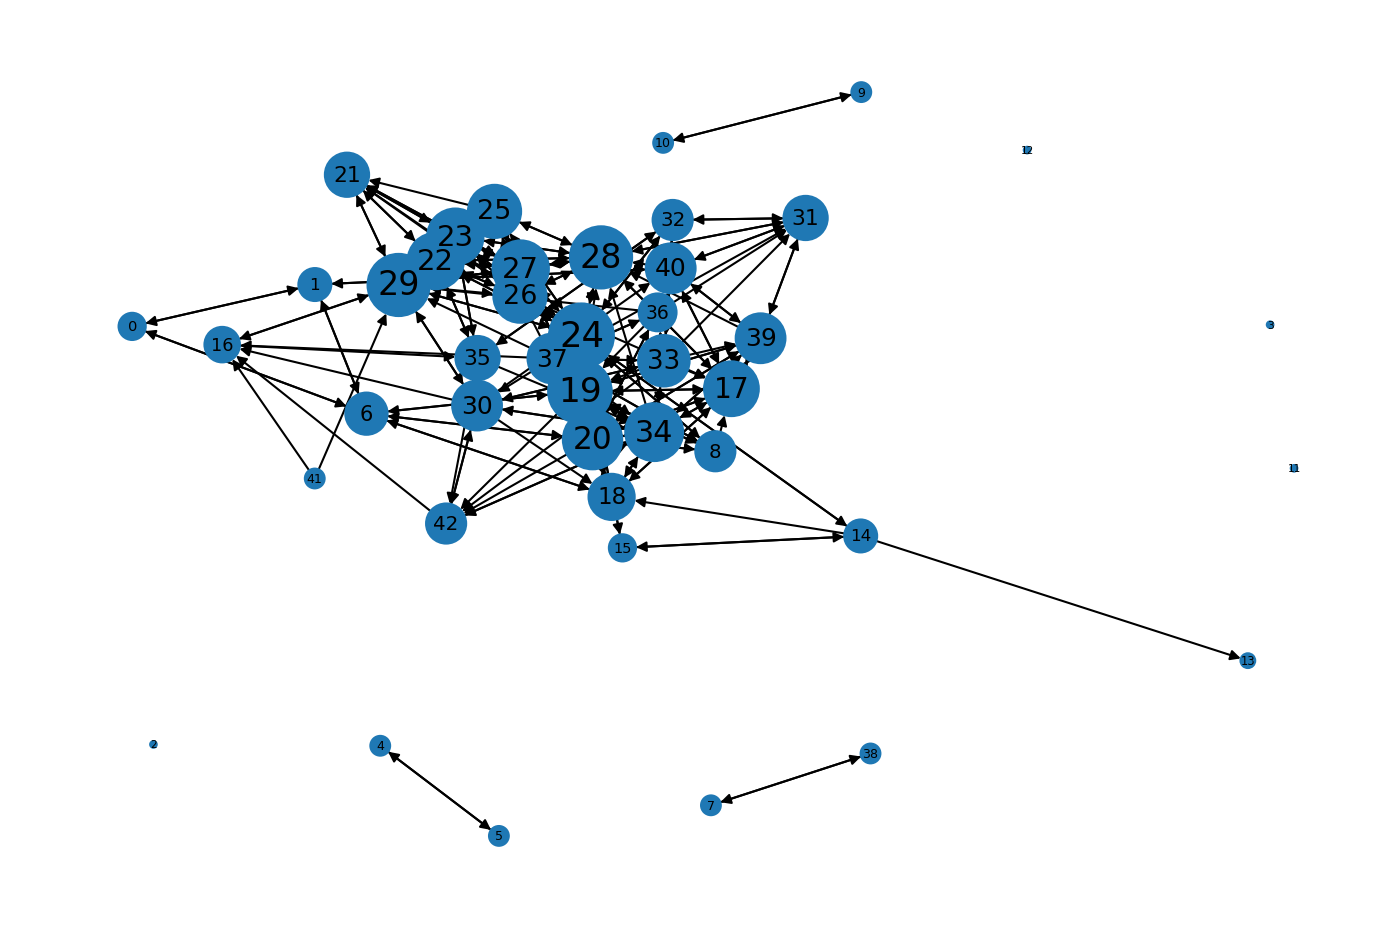

In [4]:
plt.figure(figsize=(9, 6), dpi=150)

pos = nx.fruchterman_reingold_layout(DG_friends, k=0.5, seed=1029)
d = dict(DG_friends.degree)
nx.draw(DG_friends, pos=pos, node_size=[10 + v * 40 for v in d.values()], with_labels=False)
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=5+d[node]*0.5, ha='center', va='center')

plt.show()

### 生成随机网络

In [5]:
# 真实好友网络的信息
ave_deg = 2 * len(G_friends.edges) / len(G_friends.nodes)

print(nx.info(G_friends))
print(f'Average degree is {ave_deg:.3f}')

Graph with 43 nodes and 130 edges
Average degree is 6.047


**G(n, m) 模型**

In [6]:
# 生成随机网络 gnm()
n = 43
m = 130

G_random = nx.gnm_random_graph(n, m)
ave_deg = 2 * len(G_random.edges) / len(G_random.nodes)

print(nx.info(G_random))
print(f'Average degree is {ave_deg:.3f}')

Graph with 43 nodes and 130 edges
Average degree is 6.047


**G(n,p) 模型 【如何设置参数 p？】**

In [7]:
# 生成随机网络 gnp()
n = 43
p = 0.14     # 请填写参数 p，在 0 到 1 之间

G_random = nx.gnp_random_graph(n, p)
ave_deg = 2 * len(G_random.edges) / len(G_random.nodes)

print(nx.info(G_random))
print(f'Average degree is {ave_deg:.3f}')

Graph with 43 nodes and 124 edges
Average degree is 5.767


### 随机网络可视化

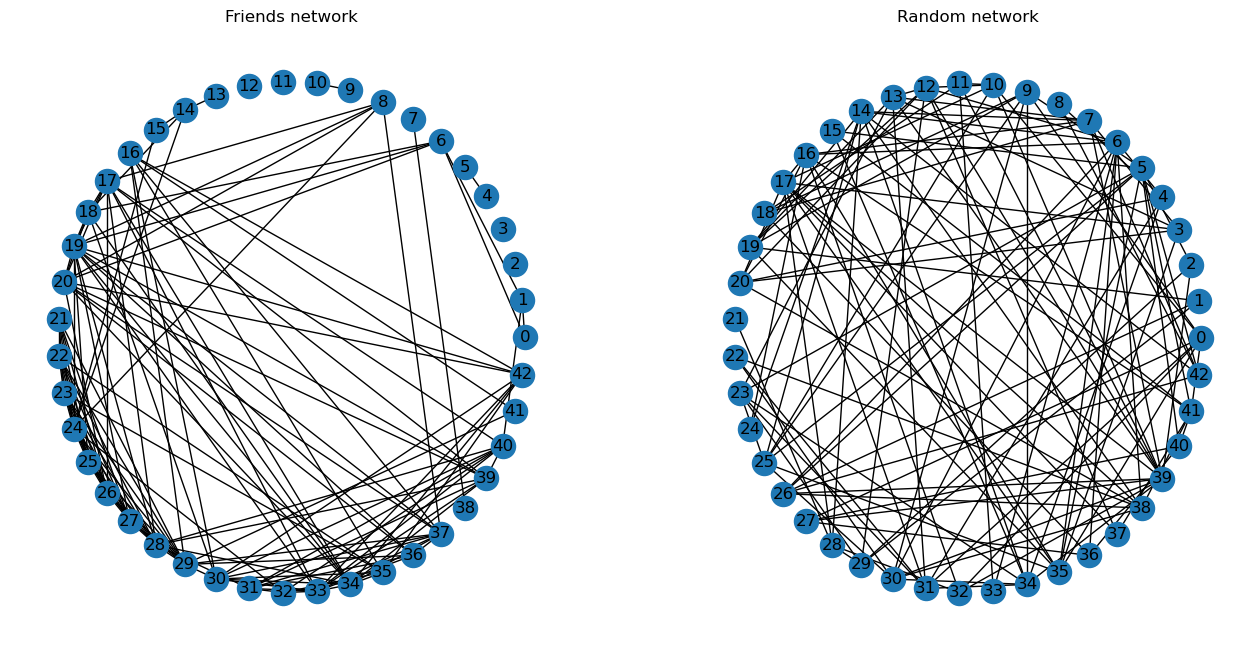

In [8]:
fig, axes = plt.subplots(figsize=(16, 8), nrows=1, ncols=2)

pos = nx.circular_layout(G_friends)
nx.draw(G_friends, pos=pos, with_labels=True, ax=axes[0])
axes[0].set_title('Friends network')

pos = nx.circular_layout(G_random)
nx.draw(G_random, pos=pos, with_labels=True, ax=axes[1])
axes[1].set_title('Random network')

plt.show()

### 度分布

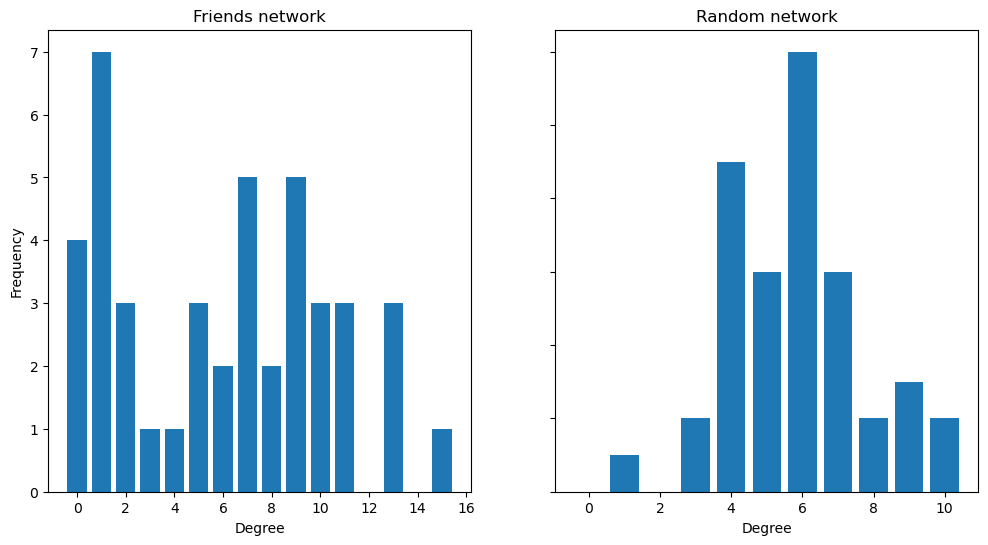

In [10]:
G_random = nx.gnp_random_graph(n, p)

def plot_degree_distriburion(G, ax, title):

    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))

    ax.bar(degrees, degree_freq)
    ax.set_title(title)
    ax.set(xlabel='Degree', ylabel='Frequency')

    ax.label_outer()

fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

plot_degree_distriburion(G_friends, axes[0], 'Friends network')
plot_degree_distriburion(G_random, axes[1], 'Random network')

plt.show()

### 配置网络 Configuration model

In [11]:
# 与真实网络具有相同的度分布
deg_sequence = [d for v, d in G_friends.degree()]
G_configuration = nx.configuration_model(deg_sequence)

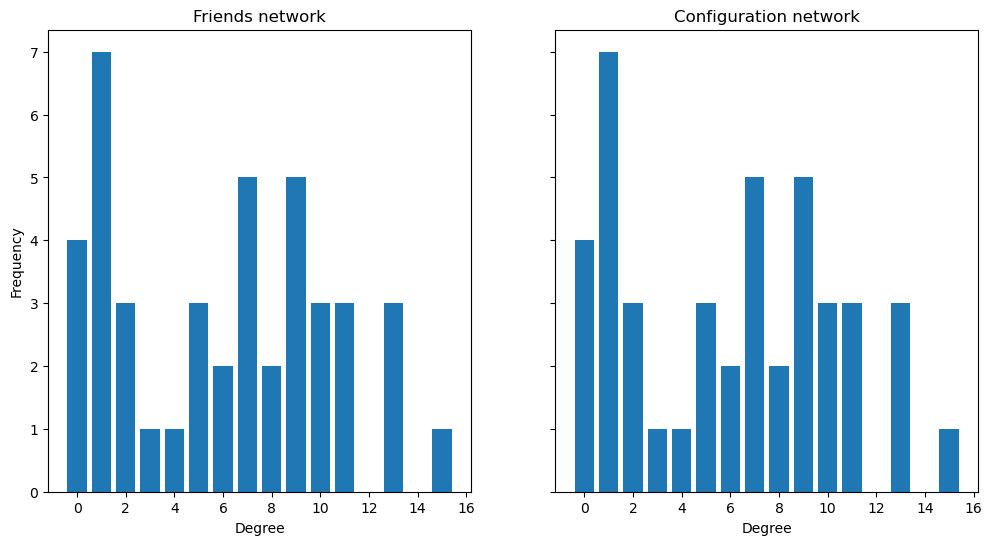

In [12]:
fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

plot_degree_distriburion(G_configuration, axes[1], 'Configuration network')
plot_degree_distriburion(G_friends, axes[0], 'Friends network')

plt.show()

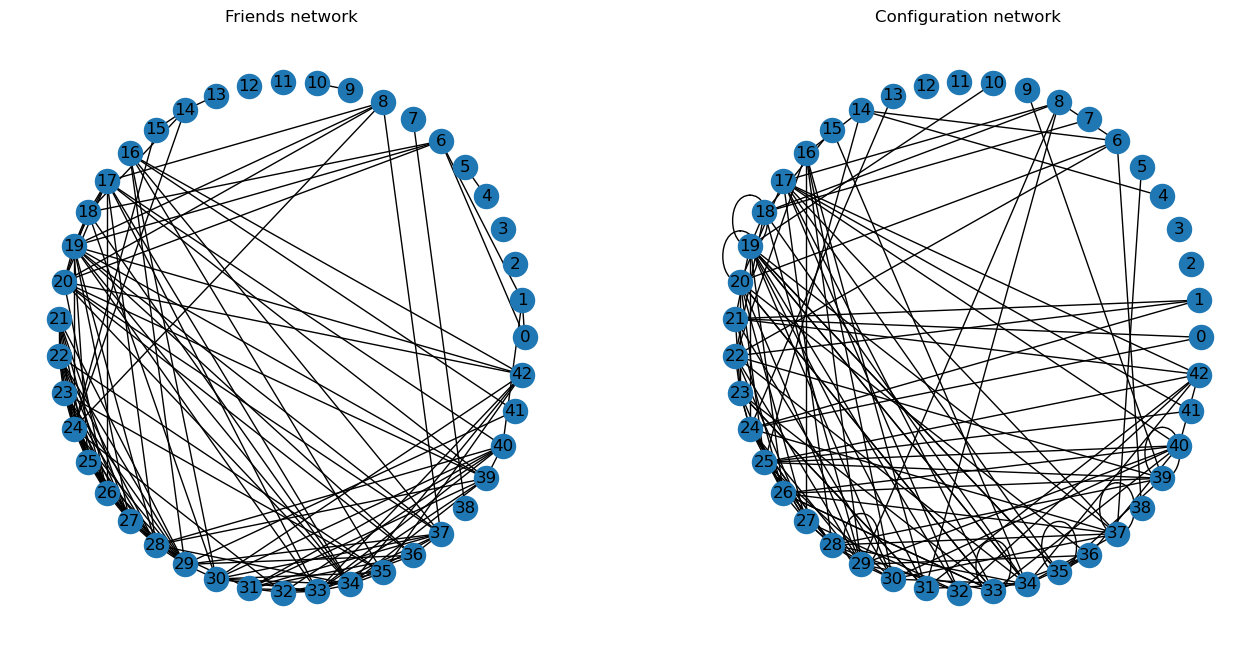

In [13]:
fig, axes = plt.subplots(figsize=(16, 8), nrows=1, ncols=2)

pos = nx.circular_layout(G_configuration)
nx.draw(G_friends, pos=pos, with_labels=True, ax=axes[0])
axes[0].set_title('Friends network')

nx.draw(G_configuration, pos=pos, with_labels=True, ax=axes[1])
axes[1].set_title('Configuration network')

plt.show()

### 同配性 Assortative

In [40]:
def plot_assortative(G, ax, title):

    degree1 = []
    degree2 = []

    for v in G:
        for neighbor in G.neighbors(v):
            degree1.append(G.degree(v))
            degree2.append(G.degree(neighbor))

    data = pd.DataFrame({'degree1': degree1,
                         'degree2': degree2})

    sns.regplot(x='degree1', y='degree2', data=data, ax=ax)
    ax.set_title(title)

    ax.label_outer()

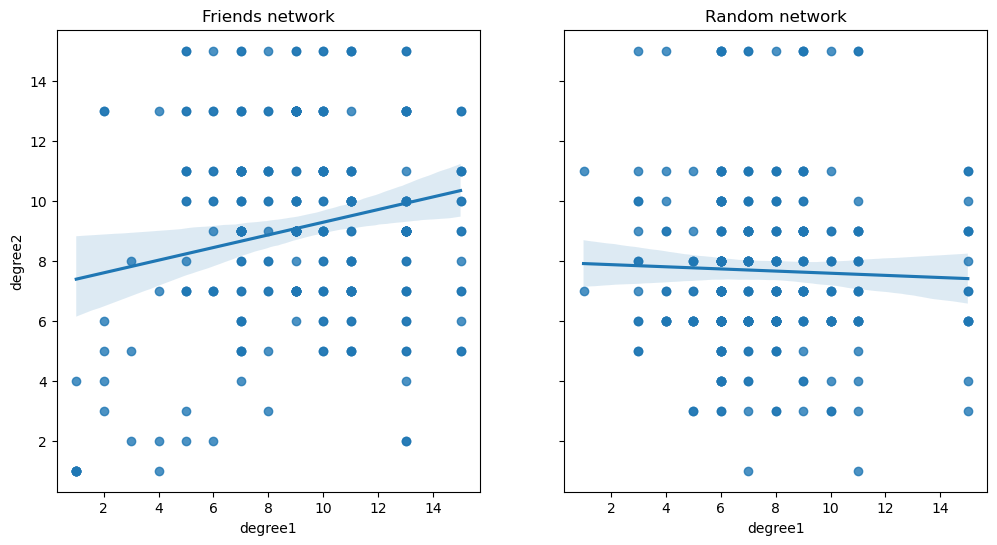

In [41]:
fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

plot_assortative(G_random, axes[1], 'Random network')
plot_assortative(G_friends, axes[0], 'Friends network')

plt.show()

### 平均距离

In [42]:
largest_cc = max(nx.connected_components(G_friends), key=len)
Gcc_friends = G_friends.subgraph(largest_cc)
print(f"班级好友网络的平均距离为 {nx.average_shortest_path_length(Gcc_friends):.2f}")

班级好友网络的平均距离为 2.06


In [43]:
# consider the connected component
largest_cc = max(nx.connected_components(G_random), key=len)
Gcc_random = G_random.subgraph(largest_cc)
print(f"随机网络的平均距离为 {nx.average_shortest_path_length(Gcc_random):.2f}")

随机网络的平均距离为 2.18


**【随着随机网络的规模（N）增大，平均距离如何变化？】**

In [46]:
# 当网络规模达到 1000 时
n = 1000
p = 10 / n

G_ls = nx.gnp_random_graph(n, p)
print(f'规模为 {n} 的随机网络的平均距离为 {nx.average_shortest_path_length(G_ls):.2f}')

规模为 1000 的随机网络的平均距离为 3.23


### 集聚系数 Clustering

In [56]:
print("班级好友网络的平均集聚系数为 {:.2f}".format(nx.average_clustering(G_friends)))
print("随机网络的平均集聚系数为 {:.2f}".format(nx.average_clustering(G_random)))

班级好友网络的平均集聚系数为 0.41
随机网络的平均集聚系数为 0.15


### 随机网络的集聚系数和平均距离

In [48]:
def random_network_clustering_distance(n, p):
    
    G_random = nx.gnp_random_graph(n, p)
    largest_cc = max(nx.connected_components(G_random), key=len)
    Gcc_random = G_random.subgraph(largest_cc)
    
    cc = nx.average_clustering(Gcc_random)
    distance = nx.average_shortest_path_length(Gcc_random)
    
    return cc, distance

In [57]:
n = 200

p_list = []
value_list = []
type_list = []

for p in tqdm(np.arange(0.001, 1, 0.05)):

    cc, distance = random_network_clustering_distance(n, p)

    value_list.append(cc)
    p_list.append(p)
    type_list.append('cc')

    value_list.append(distance)
    p_list.append(p)
    type_list.append('distance')

100%|██████████| 20/20 [01:00<00:00,  3.05s/it]


In [58]:
df = pd.DataFrame({'p': p_list,
                   'value': value_list, 
                   'type': type_list})

d_max = max(df[df['type']=='distance']['value'])
d_min = min(df[df['type']=='distance']['value'])
cc_max = max(df[df['type']=='cc']['value'])
cc_min = min(df[df['type']=='cc']['value'])

df['value'][df['type']=='distance'] = (df['value'][df['type']=='distance']-d_min) / (d_max-d_min)
df['value'][df['type']=='cc'] = (df['value'][df['type']=='cc']-cc_min) / (cc_max-cc_min)

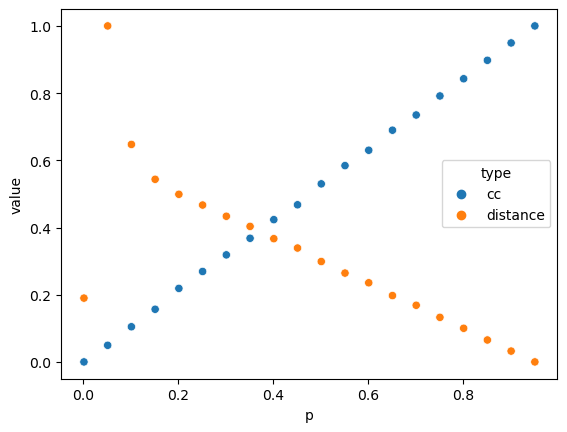

In [59]:
sns.scatterplot(x='p', y='value', hue='type', data=df)
plt.show()

### 自我网络 Ego network

In [5]:
def plot_ego_network(G, n, ax, title):
    
    nodes_ego = list(nx.ego_graph(G, n, radius=1))
    G_ego = G.subgraph(nodes_ego)
    
    cc = nx.clustering(G)[n]
    
    pos=nx.fruchterman_reingold_layout(G_ego, seed=1028)
    d = dict(G_ego.degree)

    nx.draw(G_ego, pos=pos, node_size=[v * 100 for v in d.values()], with_labels=True, ax=ax)
    ax.set_title('%s, cc=%.3f' % (title, cc))

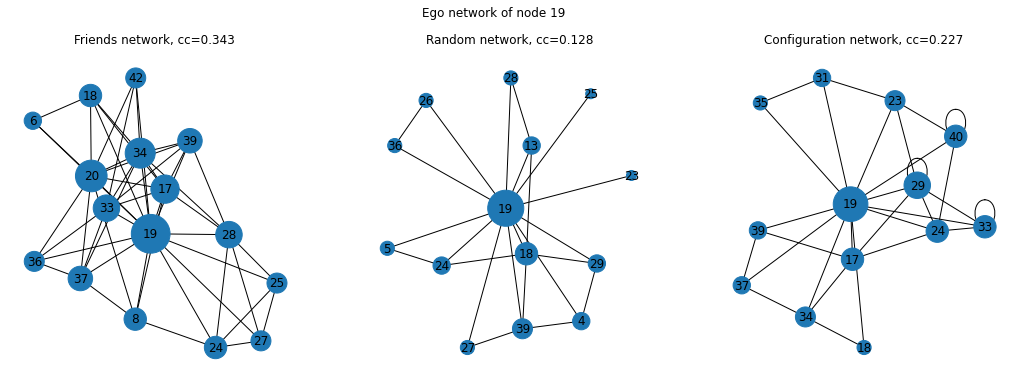

In [12]:
node = 19

fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3)
plt.suptitle('Ego network of node %d' % node)

plot_ego_network(G_random, node, axes[1], 'Random network')
plot_ego_network(nx.Graph(G_configuration), node, axes[2], 'Configuration network')
plot_ego_network(G_friends, node, axes[0], 'Friends network')

plt.show()